# Tổng quan phần tiền xử lý và khám phá dữ liệu

- Xử lí thiếu dữ liệu
- Xử lí nhiễu
- Xử lí dữ liệu ngoại lai
- Chuẩn hóa dữ liệu
- Đưa ra những cái nhìn đầu tiên về dữ liệu

# 1. Import libraries

In [1]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# 2. Data pre-precessing

- Load data

In [2]:
raw_data = pd.read_csv('../Data/raw_dataset.csv')
raw_data.head(5)

,Liên kết,Tên công ty,Tên công việc,Ngày cập nhật,Lượt xem,Mức lương,Khu vực tuyển,Yêu cầu giới tính,Cấp bậc,Thời gian thử việc,Số lượng tuyển,Hình thức làm việc,Độ tuổi,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Từ khóa,Địa chỉ công ty,Quy mô công ty
0,https://vieclam24h.vn/hanh-chinh-thu-ky/nhan-v...,Công Ty TNHH NTPM (Việt Nam),Nhân Viên Nhân Sự Tuyển Dụng,24/06/2024 09:18,1482.0,10 - 14 triệu,Bình Dương,NaN,Chuyên viên- nhân viên,02 tháng,2.0,Toàn thời gian cố định,NaN,Cao đẳng,Dưới 1 năm,Hành chính - Thư ký/Nhân sự/Luật - Pháp Lý - T...,Nhân Sự; Tuyển Dụng; Nhân Viên; Việc làm Bình ...,"Số 22 Vsip II-A, Đường số 23, Khu công nghiệp ...",Trên 300 người
1,https://vieclam24h.vn/thu-mua-kho-van-chuoi-cu...,"Công Ty TNHH Đông Nam Việt Nam (Dong Nam Co., ...",Nhân Viên Theo Dõi Đơn Hàng (Merchandiser),24/06/2024 09:10,9269.0,8 - 12 triệu,TP.HCM,Nữ,Chuyên viên- nhân viên,2 tháng,2.0,Toàn thời gian cố định,NaN,Cao đẳng,2 năm,Thu mua - Kho Vận - Chuỗi cung ứng/Hành chính ...,Merchandiser; Nhân Viên; Theo Dõi; đơn Hàng; V...,"304 Trịnh Thị Miếng, Ấp Đông, thới Tam thôn, H...",Trên 300 người
2,https://vieclam24h.vn/ke-toan/nhan-vien-ke-toa...,Công Ty TNHH HS,Nhân Viên Kế Toán Tổng Hợp - Từ 10-14 Triệu Tr...,24/06/2024 08:56,1500.0,10 - 14 triệu,TP.HCM,Nữ,Chuyên viên- nhân viên,NaN,1.0,Toàn thời gian cố định,23 - 30 tuổi,NaN,1 năm,Kế toán/Kiểm toán/Hành chính - Thư ký,Kế Toán; Tổng Hợp; Nhân Viên; 10; Triệu; Trở; ...,"- Địa điểm làm việc: Lầu 8, Tòa nhà COBI I, Số...",10 - 150 người
3,https://vieclam24h.vn/ke-toan/nhan-vien-ke-toa...,Công Ty TNHH Mirei,Nhân Viên Kế Toán,24/06/2024 08:45,41.0,7 - 9 triệu,TP.HCM,NaN,Chuyên viên- nhân viên,NaN,2.0,Toàn thời gian cố định,NaN,NaN,1 năm,Kế toán/Hành chính - Thư ký,Việc làm TP.HCM; Kế toán; Công Ty TNHH Mirei,"công ty TNHH Mirei. 37 Trần Qốc Hoàn, P4 Tân Bình",150 - 300 người
4,https://vieclam24h.vn/ban-hang-kinh-doanh/quan...,Công Ty TNHH Bảo Hiểm Nhân Thọ Cathay Việt Nam,Quản Lý Nhân Sự Phòng Kinh Doanh,24/06/2024 07:20,1888.0,16 - 50 triệu,TP.HCM,NaN,Quản lý nhóm- giám sát,Nhận Việc Ngay tháng,5.0,Toàn thời gian cố định,NaN,Đại học,Dưới 1 năm,Bán hàng - Kinh doanh/Nhân sự/Hành chính - Thư ký,Kinh Doanh; Nhân Sự; Quản Lý; Phòng; Việc làm ...,"TẦNG 3 TÒA NHÀ RIVERA PARK 7/28 THÀNH THÁI, P1...",10 - 150 người


- Cái nhìn tổng quan về dữ liệu

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Liên kết             14994 non-null  object 
 1   Tên công ty          14994 non-null  object 
 2   Tên công việc        14994 non-null  object 
 3   Ngày cập nhật        14994 non-null  object 
 4   Lượt xem             14974 non-null  float64
 5   Mức lương            14994 non-null  object 
 6   Khu vực tuyển        14994 non-null  object 
 7   Yêu cầu giới tính    4404 non-null   object 
 8   Cấp bậc              14994 non-null  object 
 9   Thời gian thử việc   6233 non-null   object 
 10  Số lượng tuyển       14993 non-null  float64
 11  Hình thức làm việc   14994 non-null  object 
 12  Độ tuổi              5126 non-null   object 
 13  Yêu cầu bằng cấp     9164 non-null   object 
 14  Yêu cầu kinh nghiệm  14994 non-null  object 
 15  Ngành nghề           14994 non-null 

- Kiểm tra missing data

In [4]:
percentage_missing_data = pd.DataFrame(raw_data.isnull().sum().sort_values(ascending=False) / len(raw_data) * 100, columns=['% missing'])
percentage_missing_data

,% missing
Yêu cầu giới tính,70.628251
Độ tuổi,65.812992
Thời gian thử việc,58.430039
Yêu cầu bằng cấp,38.882220
Địa chỉ công ty,12.011471
Lượt xem,0.133387
Số lượng tuyển,0.006669
Hình thức làm việc,0.000000
Từ khóa,0.000000
Ngành nghề,0.000000


- Có khá nhiều cột dữ liệu có giá trị missing, ta sẽ xử lí missing data theo từng cột. Một số cột có thể xử lý được như `yêu cầu giới tính`, `Độ tuổi` ,...
- Nhưng có một số cột không xử lý được như `Thời gian thử việc` ( có thể xử lý bằng KNN, nhưng dó dữ liệu thiếu nhiều nên không thể xử lý được) nên chúng ta có thể xem xét xóa nó đi.
- Một số cột không cần thiết như Liên kết, Tên công việc (Vì không có định dạng chung), Địa chỉ công ty, Quy mô công ty,.. nên chúng ta sẽ xóa nó đi.

In [5]:
# Xóa những cột không cần thiết
raw_data.drop(['Liên kết', 'Tên công việc', 'Thời gian thử việc', 'Địa chỉ công ty', 'Quy mô công ty'], axis=1, inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tên công ty          14994 non-null  object 
 1   Ngày cập nhật        14994 non-null  object 
 2   Lượt xem             14974 non-null  float64
 3   Mức lương            14994 non-null  object 
 4   Khu vực tuyển        14994 non-null  object 
 5   Yêu cầu giới tính    4404 non-null   object 
 6   Cấp bậc              14994 non-null  object 
 7   Số lượng tuyển       14993 non-null  float64
 8   Hình thức làm việc   14994 non-null  object 
 9   Độ tuổi              5126 non-null   object 
 10  Yêu cầu bằng cấp     9164 non-null   object 
 11  Yêu cầu kinh nghiệm  14994 non-null  object 
 12  Ngành nghề           14994 non-null  object 
 13  Từ khóa              14994 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.6+ MB


## 2.1 Xử lý cột Tên công ty, ngày cập nhật, lượt xem
- Từ cột `Tên công ty` có thể thấy có 2 loại công ty là Công ty cổ phần và Công ty TNHH, ta sẽ tách ra thành cột `Loại công ty` từ `Tên công ty` để xem loại công ty có ảnh hưởng đến mức lương không.
- Cột `Ngày cập nhật` chúng ta sẽ chuyển về dạng datetime để xem xét về thời gian tuyển dụng các công việc trong những thời gian gần đây.
- Cột `Lượt xem` có giá trị thiếu nhưng không đáng kể, chúng ta có thể xóa nó đi. Từ cột Lượt xem cũng ta có thể xem xét nhu cầu quan tâm việc làm của người lao động.

In [6]:
cp_signal = [ 'cp', 'cổ phần', 'cổ phần', 'ctcp', 'ct cổ phần', 'ctcp']
tnhh_signal = ['tnhh','một thành viên', 'tư nhân', 'trách nhiệm hữu hạn' , 'hộ kinh doanh', 'mtv']
name_company = raw_data['Tên công ty'].str.lower()
# name_company
# Phân tích thành 2 loại công ty: TNHH và Cổ phần nếu bất kỳ chuyển nào so khớp với tên công ty
# Nếu khớp với một trong 2 loại thì gán cho cột Loại công ty. 1 Cho công ty tnhh, 2 cho công ty cổ phần và 0 nếu không khớp với bất kỳ giá trị nào 

conditions = [
    name_company.str.contains('|'.join(tnhh_signal), regex=True, na=False),
    name_company.str.contains('|'.join(cp_signal), regex=True, na=False)
]

# Tạo danh sách giá trị tương ứng cho mỗi điều kiện
values = ['Công ty trách nhiệm hữu hạn', 'Công ty cổ phần']

# Áp dụng hàm np.select để gán giá trị cho cột 'Loại công ty'
raw_data['Loại công ty'] = np.select(conditions, values, default=0)
print(raw_data['Loại công ty'].value_counts())
# Xóa những dòng không xác định được loại công ty
raw_data = raw_data[raw_data['Loại công ty'] != '0']
print(raw_data['Loại công ty'].value_counts())

raw_data.drop(['Tên công ty'], axis=1, inplace=True)

Loại công ty
Công ty trách nhiệm hữu hạn    8912
Công ty cổ phần              5403
0                               679
Name: count, dtype: int64
Loại công ty
Công ty trách nhiệm hữu hạn    8912
Công ty cổ phần              5403
Name: count, dtype: int64


In [7]:
# Xóa bỏ những côt lượt xem bị thiếu
raw_data.dropna(subset=['Lượt xem'], inplace=True)

# Định dạng lại cột Ngày cập nhật
for i, value in enumerate(raw_data['Ngày cập nhật']):
    try:
        raw_data.at[i, 'Ngày cập nhật'] = pd.to_datetime(value, format='%d/%m/%Y %H:%M')
    except ValueError:
        print(f"Error at row {i}: {value}")
        


C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\1869993932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loại công ty', data=raw_data, palette='Set2')


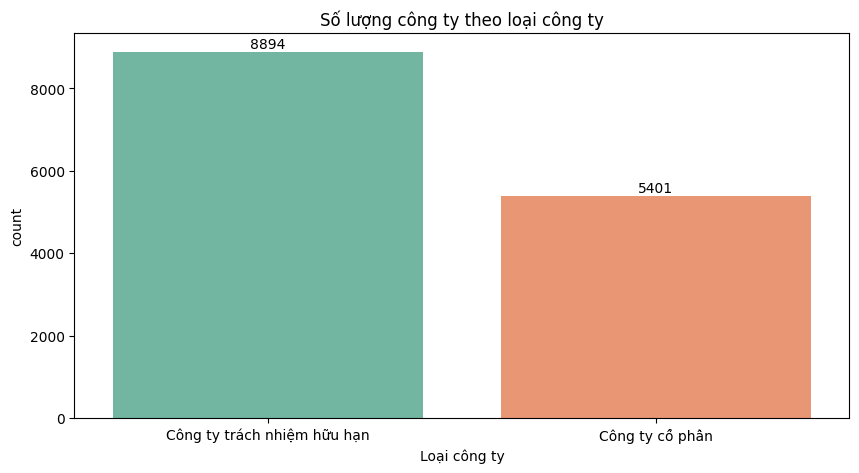

In [8]:
# Biểu đồ thể hiện số lượng công ty theo loại công ty
plt.figure(figsize=(10, 5))
sns.countplot(x='Loại công ty', data=raw_data, palette='Set2')  
plt.title('Số lượng công ty theo loại công ty')


for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

## 2.2 Xử lý cột mức lương
- Cột mức lương không có giá trị thiếu.
- Cột mức lương là có giá trị là các khoảng lương như: '10 - 15 triệu' do đó chúng ta cần chuyển thành lương cao nhất, lương thấp nhất và lương trung bình nên cần xử lý cột này.
- Một số công ty cho mức lương rất lớn so với phần còn lại của dữ liệu, chúng ta cần xem xét xem có phải là dữ liệu ngoại lai không.

In [9]:
salary = raw_data['Mức lương'].value_counts()
salary

Mức lương
10 - 15 triệu      1108
8 - 10 triệu        733
8 - 15 triệu        705
8 - 12 triệu        699
7 - 10 triệu        535
                   ... 
9 - 50 triệu          1
4 - 13 triệu          1
3.5 - 10 triệu        1
16 - 21 triệu         1
6.5 - 6.7 triệu       1
Name: count, Length: 453, dtype: int64

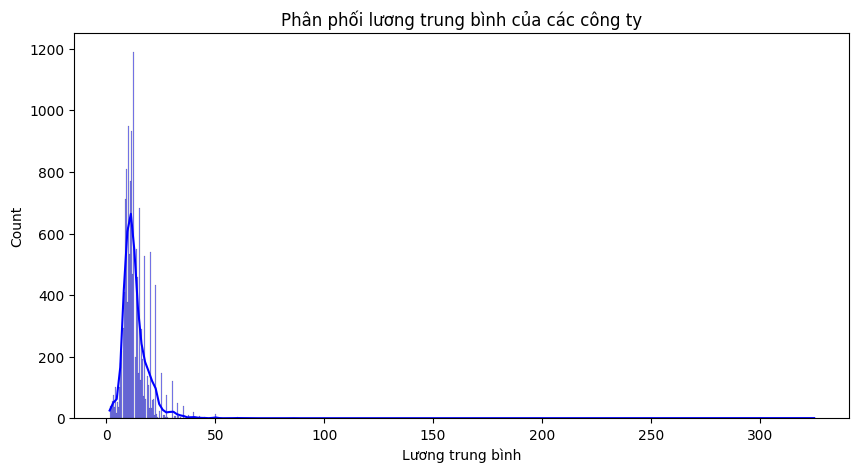

In [10]:
raw_data[['Lương tối thiểu', 'Lương tối đa']] = raw_data['Mức lương'].str.extract(r'(\d+) - (\d+) triệu')

raw_data['Lương tối thiểu'] = raw_data['Lương tối thiểu'].astype(float)
raw_data['Lương tối đa'] = raw_data['Lương tối đa'].astype(float)


# Có một số giá trị ngoại lai giữa khoảng lương, do đó chúng ta đặt ra ngưỡng là khoảng cách giữa lương tối thiểu và lương tối đa không vượt 80% tông lương tối đa.
def remove_salary_outliers(row):
    if row['Lương tối đa'] - row['Lương tối thiểu'] > 0.8 * row['Lương tối đa']:
        return np.nan
    return (row['Lương tối thiểu'] + row['Lương tối đa']) / 2

raw_data['Lương trung bình'] = raw_data.apply(remove_salary_outliers, axis=1)
# Xóa những dòng Lương trung bình NaN
raw_data = raw_data.dropna(subset=['Lương trung bình'])

# Biểu đồ distribution của lương trung bình
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Lương trung bình'], kde=True, color='blue')
plt.title('Phân phối lương trung bình của các công ty')
plt.show()

In [11]:
# Những công việc có mức lương trung bình trên 80 triệu
outlier_salary = raw_data[raw_data['Lương trung bình'] > 60]
outlier_salary


,Ngày cập nhật,Lượt xem,Mức lương,Khu vực tuyển,Yêu cầu giới tính,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Độ tuổi,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Từ khóa,Loại công ty,Lương tối thiểu,Lương tối đa,Lương trung bình
2819,2024-06-21 07:28:00,477.0,70 - 100 triệu,TP.HCM,NaN,Chuyên gia,1.0,Toàn thời gian cố định,NaN,NaN,Hơn 5 năm,Vận hành - Bảo trì - Bảo dưỡng/Dệt may - Da gi...,Mechanic; Việc làm TP.HCM; Vận hành - Bảo trì ...,Công ty trách nhiệm hữu hạn,70.0,100.0,85.0
4123,2024-06-13 18:11:00,372.0,30 - 100 triệu,Hà Nội,NaN,Quản lý cấp trung,5.0,Toàn thời gian cố định,22 - 35 tuổi,NaN,3 năm,Marketing/Thông tin - Truyền thông - Quảng cáo,Marketing; Quản Lý; Việc làm Hà Nội; Marketing...,Công ty trách nhiệm hữu hạn,30.0,100.0,65.0
6039,2024-06-04 02:42:00,56.0,25 - 100 triệu,TP.HCM,NaN,Quản lý cấp trung,2.0,Toàn thời gian cố định,NaN,Cao đẳng,Hơn 5 năm,Tài chính - Đầu tư - Chứng Khoán/Ngân hàng,Hàn; Trưởng; Bộ Phận; Nợ; Việc làm TP.HCM; Tài...,Công ty trách nhiệm hữu hạn,25.0,100.0,62.5
6606,2024-05-28 06:32:00,57.0,25 - 100 triệu,TP.HCM,NaN,Quản lý cấp trung,2.0,Toàn thời gian cố định,NaN,Cao đẳng,Hơn 5 năm,Tài chính - Đầu tư - Chứng Khoán/Ngân hàng,Hàn; Trưởng; Bộ Phận; Nợ; Việc làm TP.HCM; Tài...,Công ty trách nhiệm hữu hạn,25.0,100.0,62.5
7723,2024-06-01 04:39:00,1156.0,50 - 200 triệu,Hà Nội,NaN,Chuyên viên- nhân viên,10.0,Toàn thời gian cố định,NaN,NaN,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Bất động sản/Bảo hiểm,Kinh Doanh; Dự án; Sales; Nhân Viên; Thu Nhập;...,Công ty cổ phần,50.0,200.0,125.0
8067,2024-06-24 12:38:00,373.0,30 - 100 triệu,Hà Nội,NaN,Quản lý cấp trung,5.0,Toàn thời gian cố định,22 - 35 tuổi,NaN,3 năm,Marketing/Thông tin - Truyền thông - Quảng cáo,Marketing; Quản Lý; Việc làm Hà Nội; Marketing...,Công ty trách nhiệm hữu hạn,30.0,100.0,65.0
9022,2024-06-19 03:09:00,925.0,45 - 90 triệu,Nước ngoài,NaN,Chuyên viên- nhân viên,3.0,Toàn thời gian cố định,22 - 32 tuổi,Cao đẳng,Dưới 1 năm,Xây dựng/Quản lý dự án,Kỹ Sư; Xây Dựng; Nhật Bản; Giám Sát; Công Trìn...,Công ty cổ phần,45.0,90.0,67.5
9642,2024-06-10 04:21:00,1161.0,50 - 200 triệu,Hà Nội,NaN,Chuyên viên- nhân viên,10.0,Toàn thời gian cố định,NaN,NaN,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Bất động sản/Bảo hiểm,Kinh Doanh; Dự án; Sales; Nhân Viên; Thu Nhập;...,Công ty cổ phần,50.0,200.0,125.0
9657,2024-06-04 04:49:00,1515.0,150 - 500 triệu,TP.HCM,NaN,Chuyên viên- nhân viên,20.0,Toàn thời gian cố định,NaN,NaN,Chưa có kinh nghiệm,Bất động sản/Bán hàng - Kinh doanh/Chăm sóc kh...,Kinh Doanh; Hồ Chí Minh; Nhân Viên; Thu Nhập; ...,Công ty trách nhiệm hữu hạn,150.0,500.0,325.0
9685,2024-06-19 06:15:00,10.0,150 - 500 triệu,TP.HCM,NaN,Chuyên viên- nhân viên,20.0,Toàn thời gian cố định,NaN,NaN,Chưa có kinh nghiệm,Bất động sản/Bán hàng - Kinh doanh/Chăm sóc kh...,Việc làm TP.HCM; Bất động sản; Công Ty TNHH Th...,Công ty trách nhiệm hữu hạn,150.0,500.0,325.0


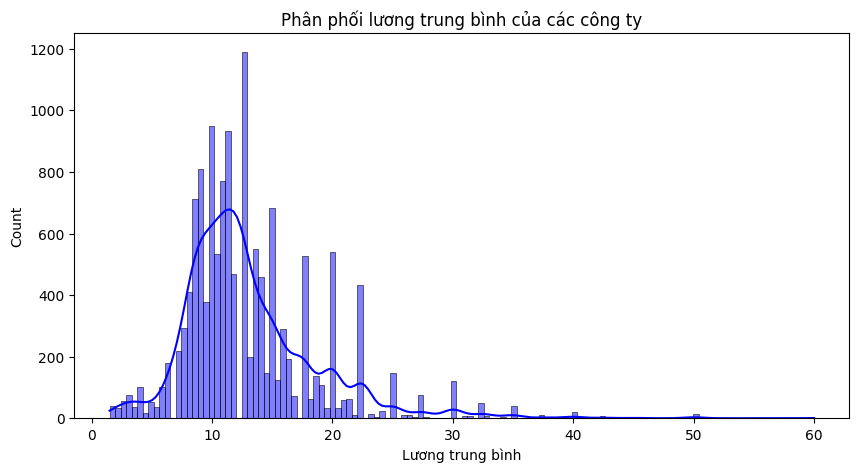

In [12]:
# Chúng ta cũng nên xóa những outlier này
raw_data = raw_data[raw_data['Lương trung bình'] <= 60]
# Biểu đồ distribution của lương trung bình
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Lương trung bình'], kde=True, color='blue')
plt.title('Phân phối lương trung bình của các công ty')
plt.show()

## 2.3 Xử lý cột yêu cầu giới tính
- Yêu cầu giới tính có rất nhiều trị thiếu, đa phần những công ty không yêu cầu giới tính nên không có thuộc tính này.

C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\4186738191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Yêu cầu giới tính', data=raw_data, palette='Set2')


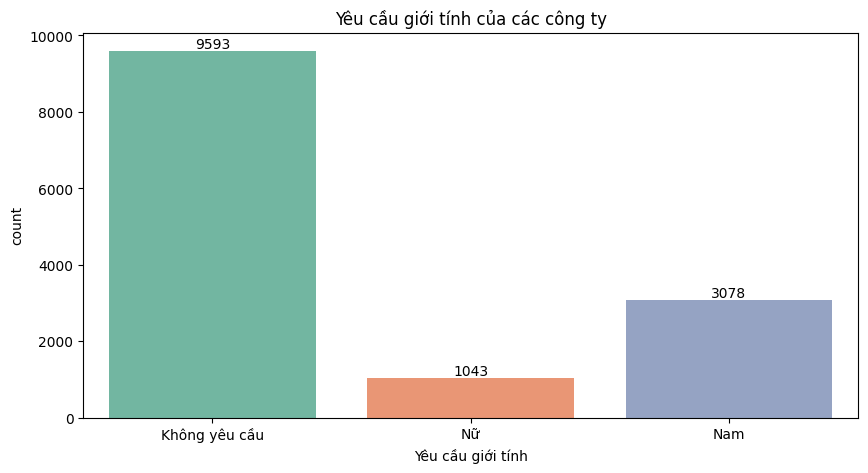

In [13]:
raw_data['Yêu cầu giới tính'].fillna('Không yêu cầu', inplace=True)

# Biểu đồ thể hiện yêu cầu giới tính của các công ty
plt.figure(figsize=(10, 5))
sns.countplot(x='Yêu cầu giới tính', data=raw_data, palette='Set2')
plt.title('Yêu cầu giới tính của các công ty')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

## 2.4 Cấp bậc, Số lượng tuyển, Hình thức làm việc
- Cột cấp bậc không có giá trị thiếu, chúng ta cùng xem phân bố dữ liệu của các cột cấp bậc.
- Ở cột số lượng tuyển thì chỉ có một giá trị null, chúng ta có thể xóa nó đi.
- Cột hình thức làm việc không có giá trị thiếu, chúng ta có thể xem phân bố của nó như thế nào.


In [14]:
# Xóa giá trị null trong số lượng tuyển
raw_data.dropna(subset=['Số lượng tuyển'], inplace=True)

raw_data['Cấp bậc'].value_counts()


Cấp bậc
Chuyên viên- nhân viên    11948
Quản lý nhóm- giám sát      761
Quản lý cấp trung           516
Cộng tác viên               371
Quản lý cấp cao              68
Chuyên gia                   43
Chưa cập nhật                 6
Name: count, dtype: int64

C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\1098430235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cấp bậc', data=raw_data, palette='Set2')


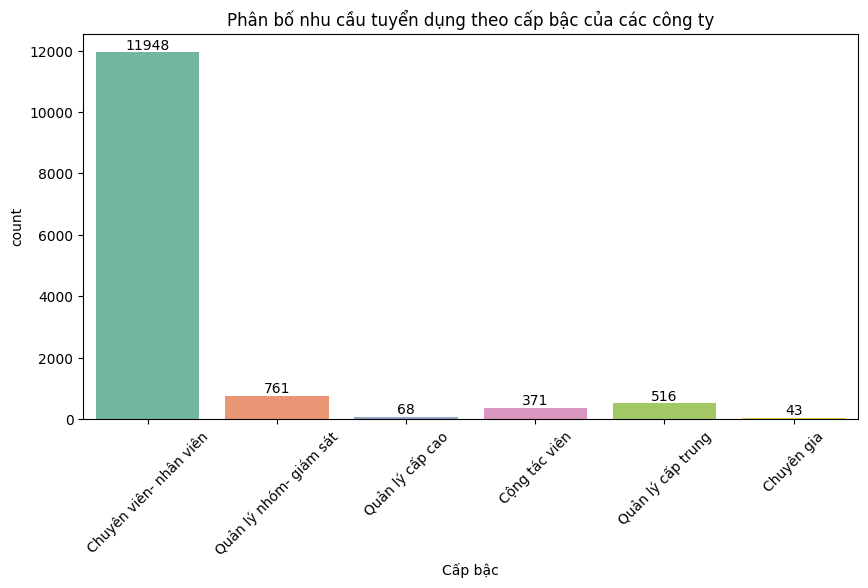

In [15]:
# Chúng ta nên xóa những công ty chưa cập nhật thông tin về cấp bậc
raw_data = raw_data[raw_data['Cấp bậc'] != 'Chưa cập nhật']
# Biểu đồ thể hiện phân bố như cầu tuyển dụng theo cấp bậc
plt.figure(figsize=(10, 5))
sns.countplot(x='Cấp bậc', data=raw_data, palette='Set2')
plt.title('Phân bố nhu cầu tuyển dụng theo cấp bậc của các công ty')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\1911924999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hình thức làm việc', data=raw_data, palette='Set2')


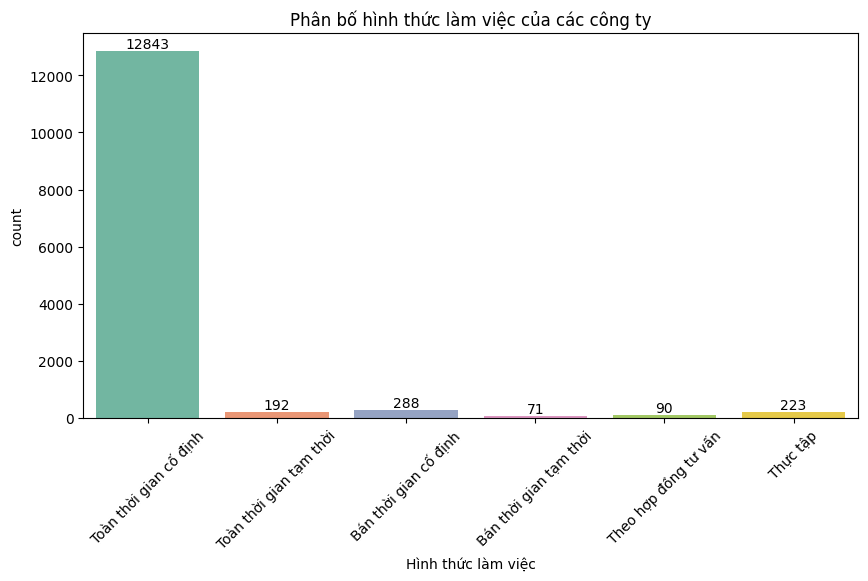

In [16]:
# Phân bố theo hình thức làm việc
plt.figure(figsize=(10, 5))
sns.countplot(x='Hình thức làm việc', data=raw_data, palette='Set2')
plt.title('Phân bố hình thức làm việc của các công ty')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()


## 2.5 Xử lý cột Độ tuổi

In [17]:
raw_data[['Tuổi tối thiểu', 'Tuổi tối đa']] = raw_data['Độ tuổi'].str.extract(r'(\d+) - (\d+) tuổi')

# Chuyển đổi giá trị tuổi từ string sang float
raw_data['Tuổi tối thiểu'] = raw_data['Tuổi tối thiểu'].astype(float)
raw_data['Tuổi tối đa'] = raw_data['Tuổi tối đa'].astype(float)
raw_data['Tuổi trung bình'] = (raw_data['Tuổi tối thiểu'] + raw_data['Tuổi tối đa']) / 2

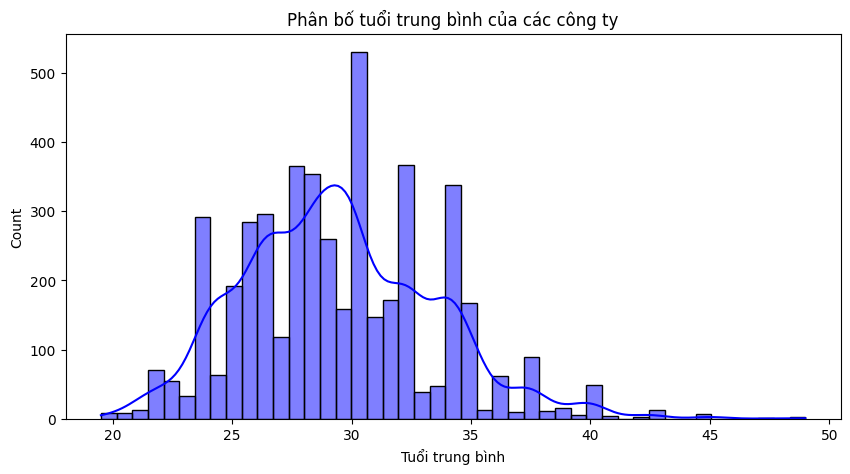

In [18]:
# Biểu đồ thể hiện phân bố tuổi trung bình 
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Tuổi trung bình'], kde=True, color='blue')
plt.title('Phân bố tuổi trung bình của các công ty')
plt.show()

C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\2794972100.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nhóm tuổi', data=raw_data, palette='Set2')


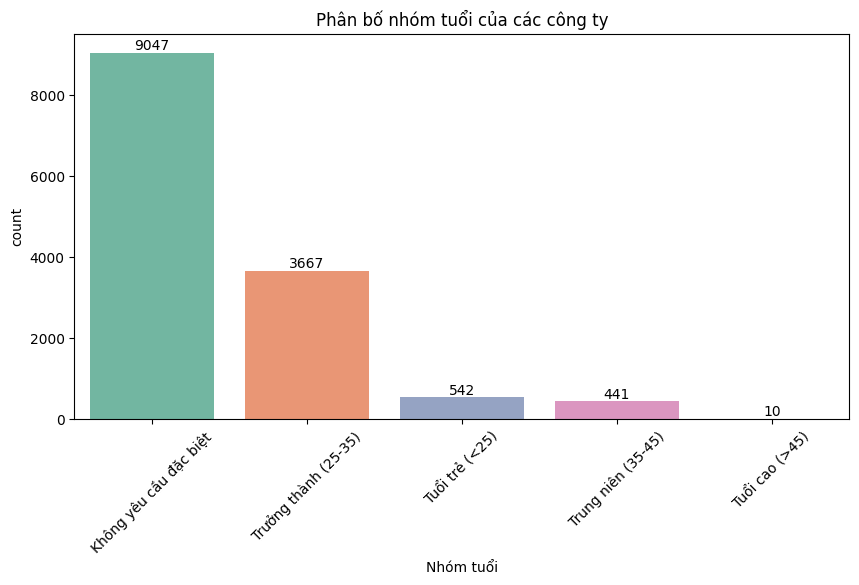

In [19]:
age_group = ['Tuổi trẻ (<25)', 'Trưởng thành (25-35)', 'Trung niên (35-45)', 'Tuổi cao (>45)', 'Không yêu cầu đặc biệt']
age_conditions = [
    (raw_data['Tuổi trung bình'] < 25),
    (raw_data['Tuổi trung bình'] >= 25) & (raw_data['Tuổi trung bình'] < 35),
    (raw_data['Tuổi trung bình'] >= 35) & (raw_data['Tuổi trung bình'] < 45),
    (raw_data['Tuổi trung bình'] >= 45),
    (raw_data['Tuổi trung bình'].isnull())
]
raw_data['Nhóm tuổi'] = np.select(age_conditions, age_group)

# Biểu đồ thể hiện phân bố nhóm tuổi
plt.figure(figsize=(10, 5))
sns.countplot(x='Nhóm tuổi', data=raw_data, palette='Set2')
plt.title('Phân bố nhóm tuổi của các công ty')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

## 2.6 Xử lý cột Yêu cầu bằng cấp, Yêu cầu kinh nghiệm
- Yêu cầu bằng cấp có nhiều dữ liệu bị thiếu, tức là doanh nghiệp không yêu cầu bằng cấp cụ thể.
- Yêu cầu kinh nghiệp không có dữ liệu bị thiếu, chúng ta có thể xem phân bố của nó như thế nào.

C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\350724970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Yêu cầu bằng cấp', data=raw_data, palette='Set2')


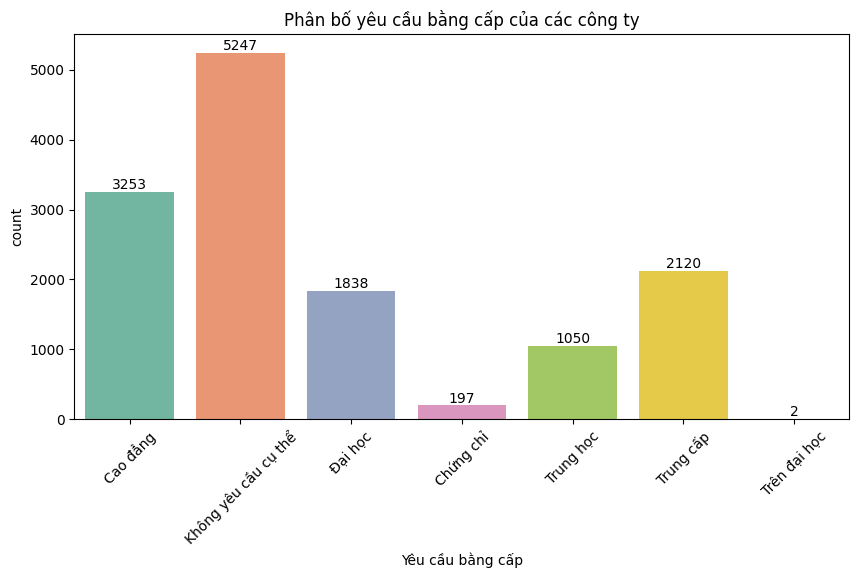

In [20]:
raw_data['Yêu cầu bằng cấp'].fillna('Không yêu cầu cụ thể', inplace=True)
# Biểu đồ phân bố yêu cầu bằng cấp của các doanh nghiệp
plt.figure(figsize=(10, 5))
sns.countplot(x='Yêu cầu bằng cấp', data=raw_data, palette='Set2')
plt.title('Phân bố yêu cầu bằng cấp của các công ty')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()


In [21]:
experience_data = raw_data['Yêu cầu kinh nghiệm'].value_counts()
experience_data

Yêu cầu kinh nghiệm
1 năm                  4741
Chưa có kinh nghiệm    3253
2 năm                  2387
Dưới 1 năm             1790
3 năm                  1040
5 năm                   306
4 năm                   105
Hơn 5 năm                84
Chưa cập nhật             1
Name: count, dtype: int64

Yêu cầu kinh nghiệm
1 năm                  4741
Chưa có kinh nghiệm    3253
2 năm                  2387
Dưới 1 năm             1790
3 năm                  1038
5 năm                   306
4 năm                   105
Hơn 5 năm                84
Name: count, dtype: int64
Yêu cầu bằng cấp
Không yêu cầu cụ thể    5246
Cao đẳng                3253
Trung cấp               2120
Đại học                 1838
Trung học               1050
Chứng chỉ                197
Name: count, dtype: int64


C:\Users\huynh\AppData\Local\Temp\ipykernel_5408\3424802106.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Yêu cầu kinh nghiệm', data=raw_data, palette='Set2')


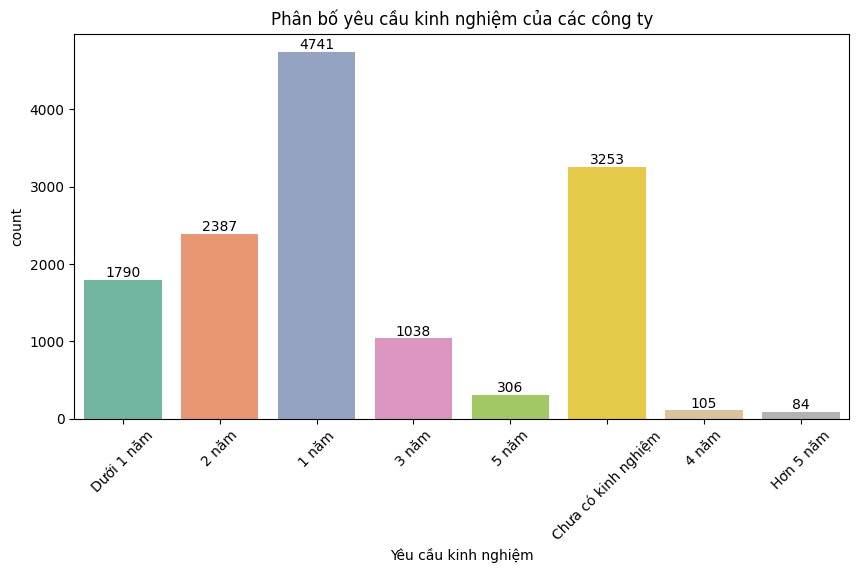

In [22]:
# Do dữ liệu trên đại học rất ít nên chúng ta xem xét xóa đi, cũng như là kinh nghiệm chưa cập nhật cũng nên xóa đi
raw_data = raw_data[raw_data['Yêu cầu bằng cấp'] != 'Trên đại học']
raw_data = raw_data[raw_data['Yêu cầu kinh nghiệm'] != 'Chưa cập nhật']

print(raw_data['Yêu cầu kinh nghiệm'].value_counts())
print(raw_data['Yêu cầu bằng cấp'].value_counts())

# Biểu đồ phân bố Yêu cầu kinh nghiệm của các công ty
plt.figure(figsize=(10, 5))
sns.countplot(x='Yêu cầu kinh nghiệm', data=raw_data, palette='Set2')
plt.title('Phân bố yêu cầu kinh nghiệm của các công ty')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

In [23]:
raw_data 

,Ngày cập nhật,Lượt xem,Mức lương,Khu vực tuyển,Yêu cầu giới tính,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Độ tuổi,Yêu cầu bằng cấp,...,Ngành nghề,Từ khóa,Loại công ty,Lương tối thiểu,Lương tối đa,Lương trung bình,Tuổi tối thiểu,Tuổi tối đa,Tuổi trung bình,Nhóm tuổi
0,2024-06-24 09:18:00,1482.0,10 - 14 triệu,Bình Dương,Không yêu cầu,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,NaN,Cao đẳng,...,Hành chính - Thư ký/Nhân sự/Luật - Pháp Lý - T...,Nhân Sự; Tuyển Dụng; Nhân Viên; Việc làm Bình ...,Công ty trách nhiệm hữu hạn,10.0,14.0,12.0,NaN,NaN,NaN,Không yêu cầu đặc biệt
1,2024-06-24 09:10:00,9269.0,8 - 12 triệu,TP.HCM,Nữ,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,NaN,Cao đẳng,...,Thu mua - Kho Vận - Chuỗi cung ứng/Hành chính ...,Merchandiser; Nhân Viên; Theo Dõi; đơn Hàng; V...,Công ty trách nhiệm hữu hạn,8.0,12.0,10.0,NaN,NaN,NaN,Không yêu cầu đặc biệt
2,2024-06-24 08:56:00,1500.0,10 - 14 triệu,TP.HCM,Nữ,Chuyên viên- nhân viên,1.0,Toàn thời gian cố định,23 - 30 tuổi,Không yêu cầu cụ thể,...,Kế toán/Kiểm toán/Hành chính - Thư ký,Kế Toán; Tổng Hợp; Nhân Viên; 10; Triệu; Trở; ...,Công ty trách nhiệm hữu hạn,10.0,14.0,12.0,23.0,30.0,26.5,Trưởng thành (25-35)
3,2024-06-24 08:45:00,41.0,7 - 9 triệu,TP.HCM,Không yêu cầu,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,NaN,Không yêu cầu cụ thể,...,Kế toán/Hành chính - Thư ký,Việc làm TP.HCM; Kế toán; Công Ty TNHH Mirei,Công ty trách nhiệm hữu hạn,7.0,9.0,8.0,NaN,NaN,NaN,Không yêu cầu đặc biệt
4,2024-06-24 07:20:00,1888.0,16 - 50 triệu,TP.HCM,Không yêu cầu,Quản lý nhóm- giám sát,5.0,Toàn thời gian cố định,NaN,Đại học,...,Bán hàng - Kinh doanh/Nhân sự/Hành chính - Thư ký,Kinh Doanh; Nhân Sự; Quản Lý; Phòng; Việc làm ...,Công ty trách nhiệm hữu hạn,16.0,50.0,33.0,NaN,NaN,NaN,Không yêu cầu đặc biệt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,01/06/2024 05:54,1084.0,3 - 7 triệu,Hà Nội,Nữ,Chuyên viên- nhân viên,10.0,Thực tập,20 - 30 tuổi,Cao đẳng,...,Khách sạn - Nhà hàng - Du lịch/Thực tập sinh/B...,Kinh Doanh; Thực Tập; Sinh; Việc làm Hà Nội; K...,Công ty trách nhiệm hữu hạn,3.0,7.0,5.0,20.0,30.0,25.0,Trưởng thành (25-35)
14990,31/05/2024 09:09,2816.0,1 - 3 triệu,TP.HCM,Không yêu cầu,Chuyên viên- nhân viên,10.0,Thực tập,NaN,Cao đẳng,...,Giáo dục - Đào tạo/Thực tập sinh/Hành chính - ...,Tiếng Anh; Thực Tập; Trợ Giảng; Sinh; Part; Ti...,Công ty cổ phần,1.0,3.0,2.0,NaN,NaN,NaN,Không yêu cầu đặc biệt
14991,29/05/2024 03:01,344.0,3 - 4 triệu,TP.HCM,Không yêu cầu,Cộng tác viên,3.0,Thực tập,19 - 22 tuổi,Không yêu cầu cụ thể,...,Bán hàng - Kinh doanh/Bất động sản/Thực tập sinh,Kinh Doanh; Thực Tập; Sinh; Việc làm TP.HCM; B...,Công ty cổ phần,3.0,4.0,3.5,19.0,22.0,20.5,Tuổi trẻ (<25)
14992,28/05/2024 09:08,1151.0,0.5 - 1 triệu,TP.HCM,Không yêu cầu,Cộng tác viên,3.0,Thực tập,NaN,Cao đẳng,...,Marketing/Thực tập sinh,Marketing; Thực Tập; Sinh; đi; Việc làm TP.HCM...,Công ty cổ phần,5.0,1.0,3.0,NaN,NaN,NaN,Không yêu cầu đặc biệt


## 2.7 Xử lý cột ngành nghề
- Các cột ngành ngành nghề thường có định dạng là 'Công việc chính/Công việc liên quan 1/Công việc liên quan 2', chúng ta sẽ tách ra thành các cột riêng biệt.

In [24]:
field = raw_data['Ngành nghề'].str.split('/', expand=True)

# Đặt tên cho các cột mới
field.columns = ['Công việc chính', 'Công việc liên quan 1', 'Công việc liên quan 2']

# Những cột mới có giá trị null, chúng ta sẽ điền giá trị 'Không yêu cầu thêm' vào những cột đó
field.fillna('Không yêu cầu thêm', inplace=True)

# Kết hợp các cột mới với DataFrame ban đầu
raw_data = pd.concat([raw_data, field], axis=1)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13704 entries, 0 to 14993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ngày cập nhật          13704 non-null  object 
 1   Lượt xem               13704 non-null  float64
 2   Mức lương              13704 non-null  object 
 3   Khu vực tuyển          13704 non-null  object 
 4   Yêu cầu giới tính      13704 non-null  object 
 5   Cấp bậc                13704 non-null  object 
 6   Số lượng tuyển         13704 non-null  float64
 7   Hình thức làm việc     13704 non-null  object 
 8   Độ tuổi                4658 non-null   object 
 9   Yêu cầu bằng cấp       13704 non-null  object 
 10  Yêu cầu kinh nghiệm    13704 non-null  object 
 11  Ngành nghề             13704 non-null  object 
 12  Từ khóa                13704 non-null  object 
 13  Loại công ty           13704 non-null  object 
 14  Lương tối thiểu        13704 non-null  float64
 15  Lương t

## 2.8 Xóa những cột không cần thiết

In [25]:
df = raw_data.drop(['Mức lương', 'Độ tuổi', 'Tuổi tối thiểu', 'Tuổi tối đa', 'Tuổi trung bình', 'Lương tối thiểu', 'Lương tối đa', 'Ngành nghề'], axis=1)
df.head()

,Ngày cập nhật,Lượt xem,Khu vực tuyển,Yêu cầu giới tính,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Từ khóa,Loại công ty,Lương trung bình,Nhóm tuổi,Công việc chính,Công việc liên quan 1,Công việc liên quan 2
0,2024-06-24 09:18:00,1482.0,Bình Dương,Không yêu cầu,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,Cao đẳng,Dưới 1 năm,Nhân Sự; Tuyển Dụng; Nhân Viên; Việc làm Bình ...,Công ty trách nhiệm hữu hạn,12.0,Không yêu cầu đặc biệt,Hành chính - Thư ký,Nhân sự,Luật - Pháp Lý - Tuân thủ
1,2024-06-24 09:10:00,9269.0,TP.HCM,Nữ,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,Cao đẳng,2 năm,Merchandiser; Nhân Viên; Theo Dõi; đơn Hàng; V...,Công ty trách nhiệm hữu hạn,10.0,Không yêu cầu đặc biệt,Thu mua - Kho Vận - Chuỗi cung ứng,Hành chính - Thư ký,Dệt may - Da giày - Thời trang
2,2024-06-24 08:56:00,1500.0,TP.HCM,Nữ,Chuyên viên- nhân viên,1.0,Toàn thời gian cố định,Không yêu cầu cụ thể,1 năm,Kế Toán; Tổng Hợp; Nhân Viên; 10; Triệu; Trở; ...,Công ty trách nhiệm hữu hạn,12.0,Trưởng thành (25-35),Kế toán,Kiểm toán,Hành chính - Thư ký
3,2024-06-24 08:45:00,41.0,TP.HCM,Không yêu cầu,Chuyên viên- nhân viên,2.0,Toàn thời gian cố định,Không yêu cầu cụ thể,1 năm,Việc làm TP.HCM; Kế toán; Công Ty TNHH Mirei,Công ty trách nhiệm hữu hạn,8.0,Không yêu cầu đặc biệt,Kế toán,Hành chính - Thư ký,Không yêu cầu thêm
4,2024-06-24 07:20:00,1888.0,TP.HCM,Không yêu cầu,Quản lý nhóm- giám sát,5.0,Toàn thời gian cố định,Đại học,Dưới 1 năm,Kinh Doanh; Nhân Sự; Quản Lý; Phòng; Việc làm ...,Công ty trách nhiệm hữu hạn,33.0,Không yêu cầu đặc biệt,Bán hàng - Kinh doanh,Nhân sự,Hành chính - Thư ký


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13704 entries, 0 to 14993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ngày cập nhật          13704 non-null  object 
 1   Lượt xem               13704 non-null  float64
 2   Khu vực tuyển          13704 non-null  object 
 3   Yêu cầu giới tính      13704 non-null  object 
 4   Cấp bậc                13704 non-null  object 
 5   Số lượng tuyển         13704 non-null  float64
 6   Hình thức làm việc     13704 non-null  object 
 7   Yêu cầu bằng cấp       13704 non-null  object 
 8   Yêu cầu kinh nghiệm    13704 non-null  object 
 9   Từ khóa                13704 non-null  object 
 10  Loại công ty           13704 non-null  object 
 11  Lương trung bình       13704 non-null  float64
 12  Nhóm tuổi              13704 non-null  object 
 13  Công việc chính        13704 non-null  object 
 14  Công việc liên quan 1  13704 non-null  object 
 15  Công vi

In [28]:
# Cuối cung, chúng ta sẽ lưu dữ liệu đã xử lý vào file csv
df.to_csv('../Data/cleaned_dataset.csv', index=False, encoding='utf-8')